### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\johne\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Loading the training and testing datasets

In [2]:
train=pd.read_csv(r"C:\John\ICTAK\Internship\Train.csv")
test=pd.read_csv(r"C:\John\ICTAK\Internship\Test.csv")

In [3]:
train

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,id_27290,58.0,admin.,married,secondary,no,567.0,yes,no,cellular,2,feb,99.0,2.0,265.0,3,other,0
31643,id_20428,51.0,management,married,tertiary,no,1072.0,no,no,unknown,20,jun,31.0,7.0,NaN,0,unknown,0
31644,id_44679,41.0,unemployed,married,primary,no,242.0,yes,no,unknown,23,may,89.0,2.0,NaN,0,unknown,0
31645,id_4841,48.0,services,married,secondary,no,2699.0,no,no,cellular,11,aug,216.0,6.0,NaN,0,unknown,0


In [4]:
test

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome
0,id_17231,55.0,retired,married,tertiary,no,7136.0,no,no,cellular,13,aug,90.0,2.0,NaN,0,unknown
1,id_34508,24.0,blue-collar,single,secondary,no,179.0,yes,no,cellular,18,may,63.0,2.0,NaN,0,unknown
2,id_44504,46.0,technician,divorced,secondary,no,143.0,no,no,cellular,8,jul,208.0,1.0,NaN,0,unknown
3,id_174,56.0,housemaid,single,unknown,no,6023.0,no,no,unknown,6,jun,34.0,1.0,NaN,0,unknown
4,id_2115,62.0,retired,married,secondary,no,2913.0,no,no,cellular,12,apr,127.0,1.0,188.0,1,success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,id_42406,29.0,management,single,tertiary,no,717.0,yes,no,cellular,15,jun,94.0,1.0,NaN,0,unknown
13560,id_14483,NaN,blue-collar,married,secondary,no,604.0,yes,no,telephone,10,jul,155.0,1.0,NaN,0,unknown
13561,id_43066,45.0,blue-collar,married,primary,no,237.0,yes,no,unknown,16,may,231.0,4.0,NaN,0,unknown
13562,id_18375,52.0,admin.,married,primary,no,241.0,yes,no,cellular,13,may,243.0,2.0,299.0,5,failure


# TRAIN DATA

In [5]:
tr=train.copy()

In [6]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                31647 non-null  object 
 1   customer_age                      31028 non-null  float64
 2   job_type                          31647 non-null  object 
 3   marital                           31497 non-null  object 
 4   education                         31647 non-null  object 
 5   default                           31647 non-null  object 
 6   balance                           31248 non-null  float64
 7   housing_loan                      31647 non-null  object 
 8   personal_loan                     31498 non-null  object 
 9   communication_type                31647 non-null  object 
 10  day_of_month                      31647 non-null  int64  
 11  month                             31647 non-null  object 
 12  last

### Viewing the no. of missing values in each columns of the train data

In [7]:
tr.isnull().sum()

id                                      0
customer_age                          619
job_type                                0
marital                               150
education                               0
default                                 0
balance                               399
housing_loan                            0
personal_loan                         149
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 311
num_contacts_in_campaign              112
days_since_prev_campaign_contact    25831
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed                 0
dtype: int64

### To check the no. of missing values and the unique no. of elements in each column

In [8]:
for i in tr.columns:
    if tr[i].isna().any() == False:
        print(i,' has no missing values')
        print(tr[i].value_counts())
        continue
    else:
        print(i,' has missing values')        
        print(tr[i].value_counts())

id  has no missing values
id
id_43823    1
id_34263    1
id_6392     1
id_3082     1
id_43162    1
           ..
id_2813     1
id_13538    1
id_1238     1
id_825      1
id_1723     1
Name: count, Length: 31647, dtype: int64
customer_age  has missing values
customer_age
34.0    1369
33.0    1344
32.0    1312
31.0    1258
36.0    1223
        ... 
95.0       1
97.0       1
89.0       1
93.0       1
92.0       1
Name: count, Length: 77, dtype: int64
job_type  has no missing values
job_type
blue-collar      6816
management       6666
technician       5220
admin.           3627
services         2923
retired          1591
self-employed    1111
entrepreneur     1037
unemployed        901
housemaid         893
student           663
unknown           199
Name: count, dtype: int64
marital  has missing values
marital
married     18945
single       8857
divorced     3695
Name: count, dtype: int64
education  has no missing values
education
secondary    16247
tertiary      9321
primary       4787
un

In [9]:
num_columns1=tr.select_dtypes(include=['int64','float64'])

In [10]:
num_columns1.columns

Index(['customer_age', 'balance', 'day_of_month', 'last_contact_duration',
       'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
       'num_contacts_prev_campaign', 'term_deposit_subscribed'],
      dtype='object')

### Checking the skew value of all the numerical columns

In [11]:
for i in num_columns1.columns:
    print(i,tr[i].skew())

customer_age 0.6619530687835736
balance 8.505127273489762
day_of_month 0.09190899020750912
last_contact_duration 3.1658690138459744
num_contacts_in_campaign 5.000171590168278
days_since_prev_campaign_contact 0.649478076491197
num_contacts_prev_campaign 45.83300679544707
term_deposit_subscribed 2.5387271995286125


### Filling the missing values with the most repeated entry, which is 'married'

In [12]:
tr.marital=train.marital.fillna('married')

In [13]:
tr.marital.value_counts()

marital
married     19095
single       8857
divorced     3695
Name: count, dtype: int64

### Filling the missing values with the most repeated entry, which is 'no'

In [14]:
tr.personal_loan=tr.personal_loan.fillna('no')

In [15]:
tr.personal_loan.value_counts()

personal_loan
no     26612
yes     5035
Name: count, dtype: int64

In [16]:
tr['customer_age'].mean()

40.43921619182674

### Filling the missing values with the mean values, which is 40

In [17]:
tr['customer_age']=tr['customer_age'].fillna(40)

### Deleting all the rows with missing values

In [18]:
tr = tr.dropna(subset=['balance'])
tr = tr.dropna(subset=['last_contact_duration'])
tr = tr.dropna(subset=['num_contacts_in_campaign'])

### Double checking to ensure there are only missing values left in 1 column

In [19]:
tr.isnull().sum()

id                                      0
customer_age                            0
job_type                                0
marital                                 0
education                               0
default                                 0
balance                                 0
housing_loan                            0
personal_loan                           0
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                   0
num_contacts_in_campaign                0
days_since_prev_campaign_contact    25181
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed                 0
dtype: int64

In [20]:
for i in num_columns1.drop('days_since_prev_campaign_contact',axis=1):
  print('  ', i)
  print('  ----')
  print('Outlier handling of', i)

  #Calculating the interquartile range
  Q1 = np.percentile(tr[i],25,method='midpoint')
  Q2 = np.percentile(tr[i],50,method='midpoint')
  Q3 = np.percentile(tr[i],75,method='midpoint')
  IQR =Q3 - Q1

    
  print("Q1 is: ",Q1)
  print("Q2 is: ",Q2)
  print("Q3 is: ",Q3)
  print('IQR =',IQR)

    
  #Finding the lower limit and upper limit
  low_lim = Q1 - 1.5*IQR
  up_lim = Q3 +1.5*IQR
  print('lower limit = ',low_lim )
  print('upper limit  ',up_lim )

  #Finding outliers
  outliers =[]


  for x in tr[i]:
    if((x < low_lim) or (x > up_lim)):
      outliers.append(x)

  print(len(outliers))
  print('outliers : ',outliers)


   customer_age
  ----
Outlier handling of customer_age
Q1 is:  32.0
Q2 is:  39.0
Q3 is:  48.0
IQR = 16.0
lower limit =  8.0
upper limit   72.0
249
outliers :  [78.0, 76.0, 73.0, 88.0, 73.0, 81.0, 79.0, 73.0, 77.0, 75.0, 74.0, 74.0, 86.0, 77.0, 79.0, 75.0, 95.0, 77.0, 74.0, 74.0, 79.0, 76.0, 74.0, 76.0, 73.0, 80.0, 75.0, 79.0, 77.0, 82.0, 79.0, 76.0, 75.0, 82.0, 73.0, 76.0, 86.0, 73.0, 77.0, 80.0, 83.0, 78.0, 75.0, 74.0, 75.0, 77.0, 74.0, 77.0, 76.0, 77.0, 77.0, 79.0, 79.0, 73.0, 79.0, 75.0, 83.0, 84.0, 73.0, 79.0, 77.0, 76.0, 78.0, 74.0, 74.0, 83.0, 73.0, 78.0, 81.0, 73.0, 73.0, 76.0, 75.0, 80.0, 75.0, 84.0, 73.0, 80.0, 74.0, 74.0, 76.0, 78.0, 78.0, 75.0, 97.0, 81.0, 82.0, 75.0, 77.0, 77.0, 73.0, 76.0, 75.0, 87.0, 73.0, 73.0, 84.0, 81.0, 80.0, 73.0, 73.0, 73.0, 86.0, 78.0, 82.0, 79.0, 77.0, 75.0, 87.0, 73.0, 81.0, 80.0, 91.0, 80.0, 73.0, 77.0, 85.0, 74.0, 74.0, 75.0, 74.0, 73.0, 75.0, 86.0, 75.0, 74.0, 75.0, 75.0, 80.0, 75.0, 75.0, 85.0, 74.0, 77.0, 74.0, 83.0, 86.0, 76.0, 85.0, 74.0,

### Even though some columns had outliers, I decided not to clip them. Since we need the raw and actual data to form clusters, squeezing them to be new values may inhibit the chances to get good clusters in the dataset

### The column 'prev_campaign outcome' had 25833 entries that was 'unknown'. So the records regarding the previous campaign is almost useless, since a majority (82%) of the campaign results are unknown. 
### Hence dropping all the columns related to the previous campaign would be wise. And other unwanted columns like id.

In [21]:
tr.drop(['id','days_since_prev_campaign_contact','num_contacts_prev_campaign','prev_campaign_outcome','day_of_month'],axis=1,inplace=True)
tr=tr.reset_index().drop('index',axis=1)

### Since there is no strong correlation between any features,  we cannot remove any columns

In [22]:
num_columns1.corr()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,term_deposit_subscribed
customer_age,1.000000,0.103411,-0.012751,-0.006935,0.006194,-0.115855,-0.001431,0.031207
balance,0.103411,1.000000,0.001626,0.016717,-0.020814,-0.122880,0.011426,0.052134
day_of_month,-0.012751,0.001626,1.000000,-0.034856,0.165168,-0.075713,-0.050596,-0.026898
last_contact_duration,-0.006935,0.016717,-0.034856,1.000000,-0.086517,-0.026646,0.005274,0.416874
num_contacts_in_campaign,0.006194,-0.020814,0.165168,-0.086517,1.000000,0.047921,-0.033212,-0.070675
days_since_prev_campaign_contact,-0.115855,-0.122880,-0.075713,-0.026646,0.047921,1.000000,-0.017738,-0.165117
num_contacts_prev_campaign,-0.001431,0.011426,-0.050596,0.005274,-0.033212,-0.017738,1.000000,0.089881
term_deposit_subscribed,0.031207,0.052134,-0.026898,0.416874,-0.070675,-0.165117,0.089881,1.000000


### Encoding the categorical variables using Label Encoder

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

le_tr=pd.DataFrame()

### Extracting all the categorical features
obj_columns=tr.select_dtypes(include='object')
for i in obj_columns.columns:
    le_tr[i]=le.fit_transform(obj_columns[i])
    
### Joining the enocded categorical features to the numerical features    
le_train_final=pd.concat([le_tr,tr.drop(obj_columns,axis=1)],axis=1,join='outer')
le_train_final

,job_type,marital,education,default,housing_loan,personal_loan,communication_type,month,customer_age,balance,last_contact_duration,num_contacts_in_campaign,term_deposit_subscribed
0,4,2,2,0,1,0,2,6,28.0,285.0,303.0,4.0,0
1,1,1,1,0,0,1,0,9,34.0,934.0,143.0,2.0,0
2,9,1,1,0,0,0,0,3,46.0,656.0,101.0,4.0,0
3,7,2,1,0,1,0,2,8,34.0,2.0,127.0,3.0,0
4,1,1,0,0,1,0,0,8,41.0,1352.0,49.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30828,0,1,1,0,1,0,0,3,58.0,567.0,99.0,2.0,0
30829,4,1,2,0,0,0,2,6,51.0,1072.0,31.0,7.0,0
30830,10,1,0,0,1,0,2,8,41.0,242.0,89.0,2.0,0
30831,7,1,1,0,0,0,0,1,48.0,2699.0,216.0,6.0,0


### Scaling the dataset using MinMax Scaler

In [24]:
from sklearn.preprocessing import MinMaxScaler 
mm=MinMaxScaler()
train_mml=mm.fit_transform(le_train_final[['customer_age','balance','last_contact_duration','num_contacts_in_campaign']])
tmml=pd.DataFrame(train_mml)
tmml.columns=le_train_final[['customer_age','balance','last_contact_duration','num_contacts_in_campaign']].columns
tmml

,customer_age,balance,last_contact_duration,num_contacts_in_campaign
0,0.126582,0.075399,0.061837,0.048387
1,0.202532,0.081291,0.029184,0.016129
2,0.354430,0.078767,0.020612,0.048387
3,0.202532,0.072829,0.025918,0.032258
4,0.291139,0.085086,0.010000,0.016129
...,...,...,...,...
30828,0.506329,0.077959,0.020204,0.016129
30829,0.417722,0.082543,0.006327,0.096774
30830,0.291139,0.075008,0.018163,0.016129
30831,0.379747,0.097315,0.044082,0.080645


### Joining the scaled dataset with encoded categorical features

In [25]:
final_trmm=pd.concat([tmml,le_train_final.drop(['customer_age','balance','last_contact_duration','num_contacts_in_campaign'],axis=1)],axis=1,join='outer')
final_trmm

,customer_age,balance,last_contact_duration,num_contacts_in_campaign,job_type,marital,education,default,housing_loan,personal_loan,communication_type,month,term_deposit_subscribed
0,0.126582,0.075399,0.061837,0.048387,4,2,2,0,1,0,2,6,0
1,0.202532,0.081291,0.029184,0.016129,1,1,1,0,0,1,0,9,0
2,0.354430,0.078767,0.020612,0.048387,9,1,1,0,0,0,0,3,0
3,0.202532,0.072829,0.025918,0.032258,7,2,1,0,1,0,2,8,0
4,0.291139,0.085086,0.010000,0.016129,1,1,0,0,1,0,0,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30828,0.506329,0.077959,0.020204,0.016129,0,1,1,0,1,0,0,3,0
30829,0.417722,0.082543,0.006327,0.096774,4,1,2,0,0,0,2,6,0
30830,0.291139,0.075008,0.018163,0.016129,10,1,0,0,1,0,2,8,0
30831,0.379747,0.097315,0.044082,0.080645,7,1,1,0,0,0,0,1,0


### Principal Component Analysis

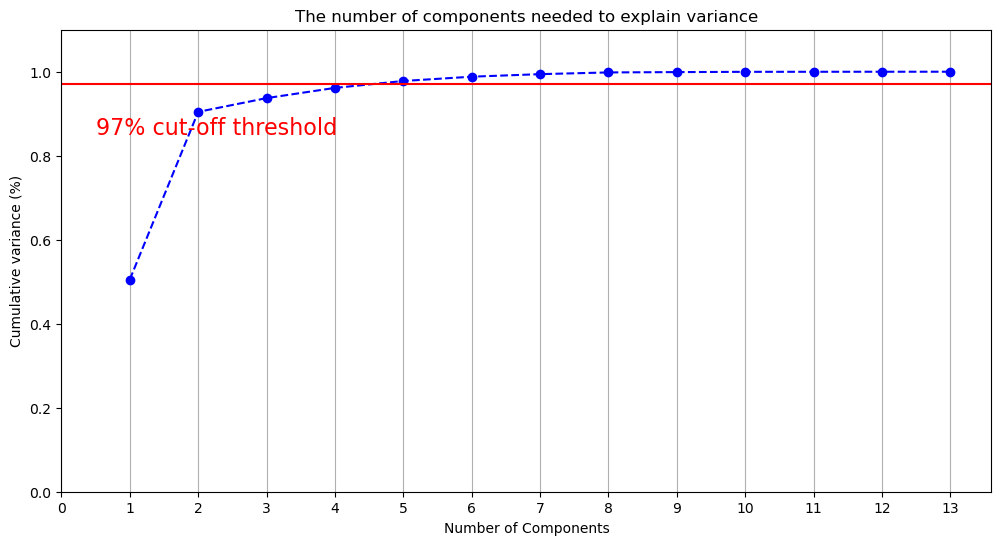

In [26]:
from sklearn.decomposition import PCA 
pca=PCA().fit(final_trmm)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 14, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 14, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.97, color='r', linestyle='-')
plt.text(0.5, 0.85, '97% cut-off threshold', color = 'red', fontsize=16)
# The above line of code, draws a line at 0.97
ax.grid(axis='x')
plt.show()


### Since the cut off is at 3, we choose the n_components to be 3

In [27]:
pca=PCA(n_components=3)
pca.fit(final_trmm)
xmm=pca.transform(final_trmm)
XMM=pd.DataFrame(xmm)
XMM

,0,1,2
0,-0.551321,0.438706,0.935123
1,-4.429338,1.608342,-1.045350
2,5.332899,-0.354513,-0.137162
3,1.269750,3.511076,1.100402
4,-4.076268,0.735194,-0.534593
...,...,...,...
30828,-2.823399,-4.175048,-0.300205
30829,-0.528826,0.399456,0.943799
30830,3.925497,4.782364,1.579398
30831,4.373975,-3.006581,0.035782


#  TEST DATASET

In [28]:
test

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome
0,id_17231,55.0,retired,married,tertiary,no,7136.0,no,no,cellular,13,aug,90.0,2.0,NaN,0,unknown
1,id_34508,24.0,blue-collar,single,secondary,no,179.0,yes,no,cellular,18,may,63.0,2.0,NaN,0,unknown
2,id_44504,46.0,technician,divorced,secondary,no,143.0,no,no,cellular,8,jul,208.0,1.0,NaN,0,unknown
3,id_174,56.0,housemaid,single,unknown,no,6023.0,no,no,unknown,6,jun,34.0,1.0,NaN,0,unknown
4,id_2115,62.0,retired,married,secondary,no,2913.0,no,no,cellular,12,apr,127.0,1.0,188.0,1,success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,id_42406,29.0,management,single,tertiary,no,717.0,yes,no,cellular,15,jun,94.0,1.0,NaN,0,unknown
13560,id_14483,NaN,blue-collar,married,secondary,no,604.0,yes,no,telephone,10,jul,155.0,1.0,NaN,0,unknown
13561,id_43066,45.0,blue-collar,married,primary,no,237.0,yes,no,unknown,16,may,231.0,4.0,NaN,0,unknown
13562,id_18375,52.0,admin.,married,primary,no,241.0,yes,no,cellular,13,may,243.0,2.0,299.0,5,failure


In [29]:
te=test.copy()

In [30]:
te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                13564 non-null  object 
 1   customer_age                      13294 non-null  float64
 2   job_type                          13564 non-null  object 
 3   marital                           13483 non-null  object 
 4   education                         13564 non-null  object 
 5   default                           13564 non-null  object 
 6   balance                           13383 non-null  float64
 7   housing_loan                      13564 non-null  object 
 8   personal_loan                     13490 non-null  object 
 9   communication_type                13564 non-null  object 
 10  day_of_month                      13564 non-null  int64  
 11  month                             13564 non-null  object 
 12  last

### Viewing the no. of missing values in each columns of the train data

In [31]:
te.isnull().sum()

id                                      0
customer_age                          270
job_type                                0
marital                                81
education                               0
default                                 0
balance                               181
housing_loan                            0
personal_loan                          74
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 122
num_contacts_in_campaign               45
days_since_prev_campaign_contact    11123
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
dtype: int64

### To check the no. of missing values and the unique no. of elements in each column

In [32]:
for i in te.columns:
    if te[i].isna().any() == False:
        print(i,' has no missing values')
        print(te[i].value_counts())
        continue
    else:
        print(te[i].value_counts())

id  has no missing values
id
id_17231    1
id_41344    1
id_9055     1
id_2649     1
id_44110    1
           ..
id_21776    1
id_38591    1
id_41677    1
id_3631     1
id_12898    1
Name: count, Length: 13564, dtype: int64
customer_age
32.0    549
33.0    548
34.0    544
31.0    539
30.0    531
       ... 
94.0      1
87.0      1
91.0      1
90.0      1
86.0      1
Name: count, Length: 73, dtype: int64
job_type  has no missing values
job_type
blue-collar      2916
management       2792
technician       2377
admin.           1544
services         1231
retired           673
self-employed     468
entrepreneur      450
unemployed        402
housemaid         347
student           275
unknown            89
Name: count, dtype: int64
marital
married     8123
single      3869
divorced    1491
Name: count, dtype: int64
education  has no missing values
education
secondary    6955
tertiary     3980
primary      2064
unknown       565
Name: count, dtype: int64
default  has no missing values
defau

In [33]:
num_columns2=te.select_dtypes(include=['int64','float64'])

### Checking the skew value of all the numerical columns

In [34]:
for i in num_columns2.columns:
    print(i,te[i].skew())

customer_age 0.6667091690008243
balance 6.76816371599829
day_of_month 0.09581935056612031
last_contact_duration 3.0616611634135267
num_contacts_in_campaign 4.436171195112908
days_since_prev_campaign_contact 0.7950170097776396
num_contacts_prev_campaign 6.26169287348231


In [35]:
te.customer_age.mean()

40.450428764856326

### Filling the missing values with the mean values, which is 40

In [36]:
te['customer_age']=te['customer_age'].fillna(40)

### Deleting all the rows with missing values

In [37]:
te = te.dropna(subset=['balance'])
te = te.dropna(subset=['last_contact_duration'])
te = te.dropna(subset=['num_contacts_in_campaign'])

In [38]:
te.marital.value_counts()

marital
married     7916
single      3765
divorced    1458
Name: count, dtype: int64

In [39]:
te.personal_loan.value_counts()

personal_loan
no     11021
yes     2126
Name: count, dtype: int64

### Filling the missing values in marital column with the most repeated entry, which is 'married'
### Filling the missing values in personal_loan column with the most repeated entry, which is 'no'

In [40]:
te.marital=te.marital.fillna('married')
te.personal_loan=te.personal_loan.fillna('no')

### Double checking to ensure there are only missing values left in 1 column

In [41]:
te.isnull().sum()

id                                      0
customer_age                            0
job_type                                0
marital                                 0
education                               0
default                                 0
balance                                 0
housing_loan                            0
personal_loan                           0
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                   0
num_contacts_in_campaign                0
days_since_prev_campaign_contact    10840
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
dtype: int64

In [42]:
for i in num_columns2.drop('days_since_prev_campaign_contact',axis=1):
  print('  ', i)
  print('  ----')
  print('Outlier handling of', i)

  #Calculating the interquartile range
  Q1 = np.percentile(te[i],25,method='midpoint')
  Q2 = np.percentile(te[i],50,method='midpoint')
  Q3 = np.percentile(te[i],75,method='midpoint')
  IQR =Q3 - Q1

    
  print("Q1 is: ",Q1)
  print("Q2 is: ",Q2)
  print("Q3 is: ",Q3)
  print('IQR =',IQR)

    
  #Finding the lower limit and upper limit
  low_lim = Q1 - 1.5*IQR
  up_lim = Q3 +1.5*IQR
  print('lower limit = ',low_lim )
  print('upper limit  ',up_lim )

  #Finding outliers
  outliers =[]


  for x in te[i]:
    if((x < low_lim) or (x > up_lim)):
      outliers.append(x)

  print(len(outliers))
  print('outliers : ',outliers)


   customer_age
  ----
Outlier handling of customer_age
Q1 is:  32.0
Q2 is:  39.0
Q3 is:  48.0
IQR = 16.0
lower limit =  8.0
upper limit   72.0
97
outliers :  [79.0, 73.0, 74.0, 73.0, 78.0, 81.0, 80.0, 80.0, 73.0, 81.0, 81.0, 79.0, 73.0, 79.0, 80.0, 75.0, 73.0, 79.0, 85.0, 74.0, 73.0, 77.0, 74.0, 75.0, 85.0, 75.0, 85.0, 78.0, 73.0, 82.0, 76.0, 81.0, 84.0, 75.0, 83.0, 76.0, 80.0, 81.0, 76.0, 75.0, 74.0, 83.0, 79.0, 84.0, 82.0, 94.0, 80.0, 81.0, 76.0, 73.0, 79.0, 82.0, 79.0, 84.0, 78.0, 80.0, 78.0, 74.0, 78.0, 73.0, 82.0, 79.0, 75.0, 87.0, 78.0, 73.0, 79.0, 81.0, 81.0, 81.0, 77.0, 91.0, 80.0, 77.0, 78.0, 74.0, 84.0, 79.0, 74.0, 83.0, 77.0, 74.0, 79.0, 78.0, 77.0, 74.0, 77.0, 77.0, 74.0, 74.0, 84.0, 80.0, 85.0, 90.0, 86.0, 78.0, 75.0]
   balance
  ----
Outlier handling of balance
Q1 is:  70.5
Q2 is:  447.0
Q3 is:  1462.5
IQR = 1392.0
lower limit =  -2017.5
upper limit   3550.5
1335
outliers :  [7136.0, 6023.0, 3815.0, 5240.0, 10758.0, 6731.0, 4408.0, 19099.0, 5769.0, 6824.0, 3930.0, 5087.

### Even though some columns had outliers, I decided not to clip them. Since we need the raw and actual data to form clusters, squeezing them to be new values may inhibit the chances to get good clusters in the dataset

### Since there is no strong correlation between any features,  we cannot remove any columns

In [43]:
num_columns2.corr()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign
customer_age,1.000000,0.071056,-0.003546,0.004736,0.004224,-0.093793,0.006383
balance,0.071056,1.000000,0.009223,0.032500,0.004399,-0.096155,0.033431
day_of_month,-0.003546,0.009223,1.000000,-0.021915,0.155727,-0.123612,-0.057912
last_contact_duration,0.004736,0.032500,-0.021915,1.000000,-0.083385,-0.025486,-0.015006
num_contacts_in_campaign,0.004224,0.004399,0.155727,-0.083385,1.000000,0.061568,-0.033046
days_since_prev_campaign_contact,-0.093793,-0.096155,-0.123612,-0.025486,0.061568,1.000000,-0.040578
num_contacts_prev_campaign,0.006383,0.033431,-0.057912,-0.015006,-0.033046,-0.040578,1.000000


### The column 'prev_campaign outcome' had 11126 entries that was 'unknown'. So the records regarding the previous campaign is almost useless, since a majority (82%) of the campaign results are unknown. 
### Hence dropping all the columns related to the previous campaign would be wise. And other unwanted columns like id.

In [44]:
te.drop(['id','days_since_prev_campaign_contact','num_contacts_prev_campaign','prev_campaign_outcome'],axis=1,inplace=True)
te=te.reset_index().drop('index',axis=1)

In [45]:
te

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign
0,55.0,retired,married,tertiary,no,7136.0,no,no,cellular,13,aug,90.0,2.0
1,24.0,blue-collar,single,secondary,no,179.0,yes,no,cellular,18,may,63.0,2.0
2,46.0,technician,divorced,secondary,no,143.0,no,no,cellular,8,jul,208.0,1.0
3,56.0,housemaid,single,unknown,no,6023.0,no,no,unknown,6,jun,34.0,1.0
4,62.0,retired,married,secondary,no,2913.0,no,no,cellular,12,apr,127.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13213,29.0,management,single,tertiary,no,717.0,yes,no,cellular,15,jun,94.0,1.0
13214,40.0,blue-collar,married,secondary,no,604.0,yes,no,telephone,10,jul,155.0,1.0
13215,45.0,blue-collar,married,primary,no,237.0,yes,no,unknown,16,may,231.0,4.0
13216,52.0,admin.,married,primary,no,241.0,yes,no,cellular,13,may,243.0,2.0


### Encoding the categorical variables using Label Encoder

In [46]:
le_te=pd.DataFrame()


### Extracting all the categorical features
obj_columns=te.select_dtypes(include='object')
for i in obj_columns.columns:
    le_te[i]=le.fit_transform(obj_columns[i])

### Joining the enocded categorical features to the numerical features        
le_test_final=pd.concat([le_te,te.drop(obj_columns,axis=1)],axis=1,join='outer')
le_test_final

,job_type,marital,education,default,housing_loan,personal_loan,communication_type,month,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign
0,5,1,2,0,0,0,0,1,55.0,7136.0,13,90.0,2.0
1,1,2,1,0,1,0,0,8,24.0,179.0,18,63.0,2.0
2,9,0,1,0,0,0,0,5,46.0,143.0,8,208.0,1.0
3,3,2,3,0,0,0,2,6,56.0,6023.0,6,34.0,1.0
4,5,1,1,0,0,0,0,0,62.0,2913.0,12,127.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13213,4,2,2,0,1,0,0,6,29.0,717.0,15,94.0,1.0
13214,1,1,1,0,1,0,1,5,40.0,604.0,10,155.0,1.0
13215,1,1,0,0,1,0,2,8,45.0,237.0,16,231.0,4.0
13216,0,1,0,0,1,0,0,8,52.0,241.0,13,243.0,2.0


### Scaling the dataset using MinMax Scaler

In [47]:
from sklearn.preprocessing import MinMaxScaler 
mm=MinMaxScaler()
test_mml=mm.fit_transform(le_test_final[['customer_age','balance','last_contact_duration','num_contacts_in_campaign']])
tmme=pd.DataFrame(test_mml)
tmme.columns=le_test_final[['customer_age','balance','last_contact_duration','num_contacts_in_campaign']].columns
tmme

,customer_age,balance,last_contact_duration,num_contacts_in_campaign
0,0.486842,0.179212,0.023298,0.026316
1,0.078947,0.090061,0.016309,0.026316
2,0.368421,0.089600,0.053844,0.000000
3,0.500000,0.164950,0.008801,0.000000
4,0.578947,0.125096,0.032876,0.000000
...,...,...,...,...
13213,0.144737,0.096955,0.024333,0.000000
13214,0.289474,0.095507,0.040124,0.000000
13215,0.355263,0.090804,0.059798,0.078947
13216,0.447368,0.090856,0.062904,0.026316


### Joining the scaled dataset with encoded categorical features

In [48]:
final_temm=pd.concat([tmme,le_test_final.drop(['customer_age','balance','last_contact_duration','num_contacts_in_campaign'],axis=1)],axis=1,join='outer')
final_temm

,customer_age,balance,last_contact_duration,num_contacts_in_campaign,job_type,marital,education,default,housing_loan,personal_loan,communication_type,month,day_of_month
0,0.486842,0.179212,0.023298,0.026316,5,1,2,0,0,0,0,1,13
1,0.078947,0.090061,0.016309,0.026316,1,2,1,0,1,0,0,8,18
2,0.368421,0.089600,0.053844,0.000000,9,0,1,0,0,0,0,5,8
3,0.500000,0.164950,0.008801,0.000000,3,2,3,0,0,0,2,6,6
4,0.578947,0.125096,0.032876,0.000000,5,1,1,0,0,0,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13213,0.144737,0.096955,0.024333,0.000000,4,2,2,0,1,0,0,6,15
13214,0.289474,0.095507,0.040124,0.000000,1,1,1,0,1,0,1,5,10
13215,0.355263,0.090804,0.059798,0.078947,1,1,0,0,1,0,2,8,16
13216,0.447368,0.090856,0.062904,0.026316,0,1,0,0,1,0,0,8,13


### Principal Component Analysis

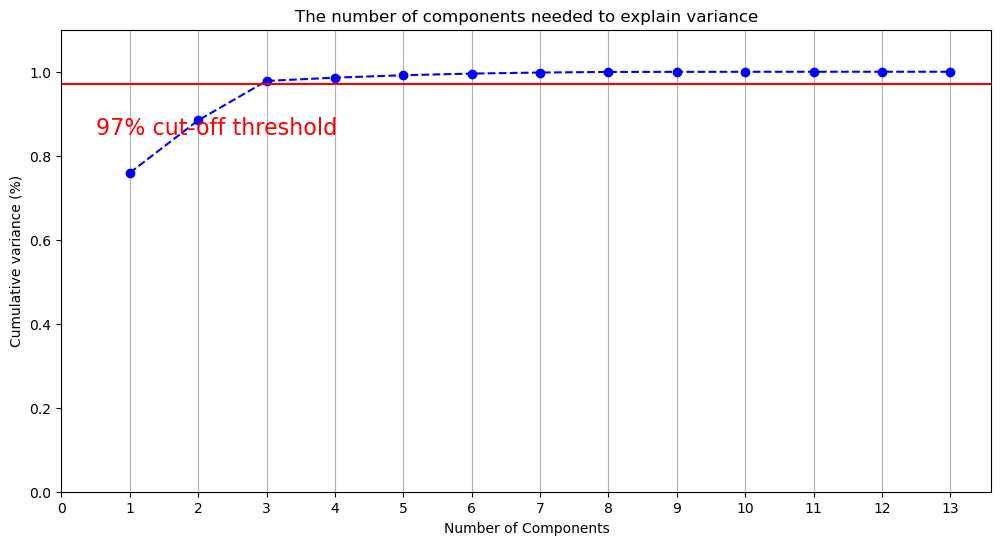

In [49]:
pca=PCA().fit(final_temm)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 14, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 14, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.97, color='r', linestyle='-')
plt.text(0.5, 0.85, '97% cut-off threshold', color = 'red', fontsize=16)
# The above line of code, draws a line at 0.97
ax.grid(axis='x')
plt.show()

### Since the cut off is at 2, we choose the n_components to be 2

In [50]:
pca=PCA(n_components=2)
pca.fit(final_temm)
xmm=pca.transform(final_temm)
XMM=pd.DataFrame(xmm)
XMM

,0,1
0,-2.709660,2.593545
1,2.205220,-4.103342
2,-7.677138,4.530463
3,-9.759055,-1.306867
4,-3.708685,2.989337
...,...,...
13213,-0.745549,-0.470030
13214,-5.785340,-2.801514
13215,0.195380,-4.254498
13216,-2.809542,-4.988656
